# Logistic Regression

Ref: Chap 4 of Mar18

https://cfteach.github.io/brds/referencesmd.html

In [1]:
import pymc3 as pm
import numpy as np
import pandas as pd
import theano.tensor as tt
import seaborn as sns
import scipy.stats as stats
from scipy.special import expit as logistic
import matplotlib.pyplot as plt
import arviz as az
import requests
import io 

In [2]:
az.style.use('arviz-darkgrid')

Text(0, 0.5, 'logistic(z)')

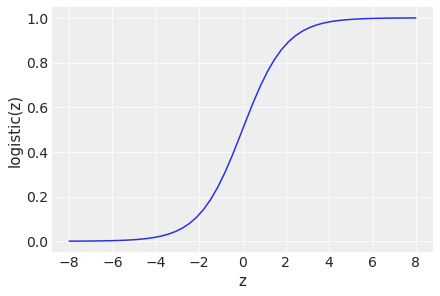

In [3]:
z = np.linspace(-8, 8)
plt.plot(z, 1 / (1 + np.exp(-z)))
plt.xlabel('z')
plt.ylabel('logistic(z)')

## The Iris Dataset

In [4]:
target_url = 'https://raw.githubusercontent.com/cfteach/brds/main/datasets/iris.csv' 

download = requests.get(target_url).content
iris = pd.read_csv(io.StringIO(download.decode('utf-8')))

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:xlabel='species', ylabel='sepal_length'>

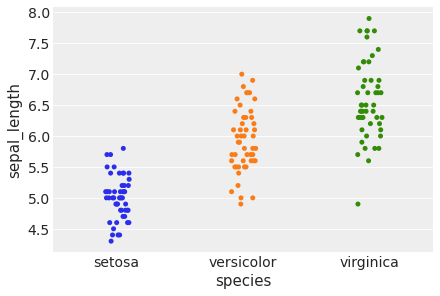

In [5]:
#using stripplot function from seaborn 

sns.stripplot(x="species", y="sepal_length", data=iris, jitter=True)



/Users/cfanelli/Desktop/teaching/BRDS/jupynb_env_new/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  self._figure.tight_layout(*args, **kwargs)


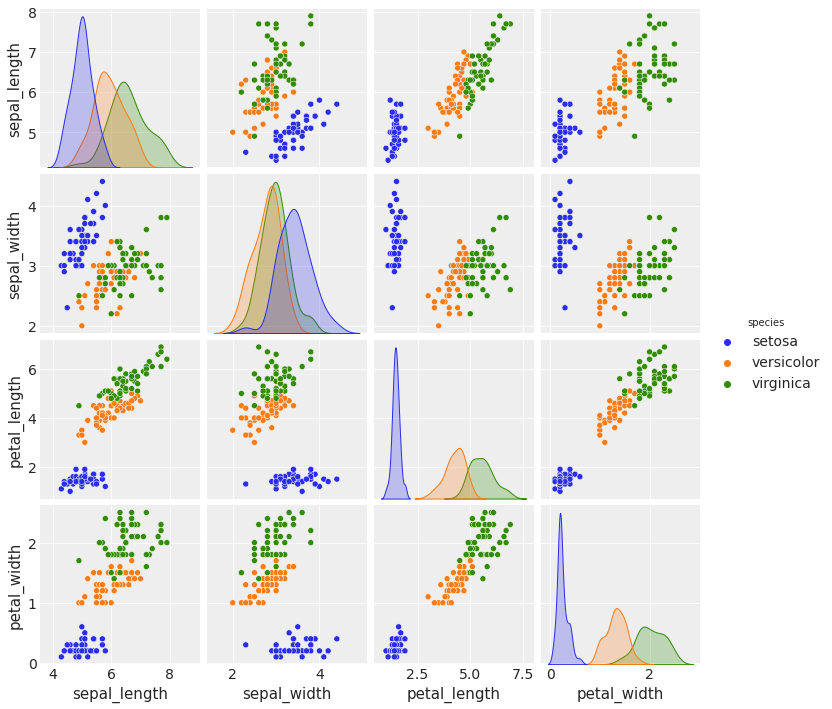

In [6]:
sns.pairplot(iris, hue='species', diag_kind='kde')

### The logistic model applied to the iris dataset 

In [7]:
df = iris.query("species == ('setosa', 'versicolor')")

In [8]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


In [9]:
y_0 = pd.Categorical(df['species']).codes

In [10]:
print(y_0, len(y_0))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] 100


In [12]:
# let's select one variate
x_n = 'sepal_length'
x_0 = df[x_n].values
#print(x_0)

# let's center our dataset, as we have done in other exercises
x_c = x_0 - x_0.mean()
print(x_c)

[-0.371 -0.571 -0.771 -0.871 -0.471 -0.071 -0.871 -0.471 -1.071 -0.571
 -0.071 -0.671 -0.671 -1.171  0.329  0.229 -0.071 -0.371  0.229 -0.371
 -0.071 -0.371 -0.871 -0.371 -0.671 -0.471 -0.471 -0.271 -0.271 -0.771
 -0.671 -0.071 -0.271  0.029 -0.571 -0.471  0.029 -0.571 -1.071 -0.371
 -0.471 -0.971 -1.071 -0.471 -0.371 -0.671 -0.371 -0.871 -0.171 -0.471
  1.529  0.929  1.429  0.029  1.029  0.229  0.829 -0.571  1.129 -0.271
 -0.471  0.429  0.529  0.629  0.129  1.229  0.129  0.329  0.729  0.129
  0.429  0.629  0.829  0.629  0.929  1.129  1.329  1.229  0.529  0.229
  0.029  0.029  0.329  0.529 -0.071  0.529  1.229  0.829  0.129  0.029
  0.029  0.629  0.329 -0.471  0.129  0.229  0.229  0.729 -0.371  0.229]


In [13]:
with pm.Model() as model_0:
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=10)
    
    μ = α + pm.math.dot(x_c, β)    
    θ = pm.Deterministic('θ', pm.math.sigmoid(μ))
    bd = pm.Deterministic('bd', -α/β)
    
    yl = pm.Bernoulli('yl', p=θ, observed=y_0)

    trace_0 = pm.sample(2000, tune = 2000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [β, α]


/Users/cfanelli/Desktop/teaching/BRDS/jupynb_env_new/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/cfanelli/Desktop/teaching/BRDS/jupynb_env_new/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/cfanelli/Desktop/teaching/BRDS/jupynb_env_new/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/cfanelli/Desktop/teaching/BRDS/jupynb_env_new/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 9 seconds.


In [14]:
varnames = ['α', 'β', 'bd']
res = az.summary(trace_0)
#print(res)
az.summary(trace_0)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α,0.311,0.337,-0.303,0.953,0.005,0.004,4813.0,4181.0,1.0
β,5.385,1.039,3.520,7.397,0.016,0.011,4358.0,4898.0,1.0
θ[0],0.165,0.058,0.059,0.270,0.001,0.001,5587.0,5727.0,1.0
θ[1],0.068,0.036,0.010,0.133,0.000,0.000,5327.0,5439.0,1.0
θ[2],0.027,0.020,0.001,0.063,0.000,0.000,5127.0,5376.0,1.0
...,...,...,...,...,...,...,...,...,...
θ[96],0.814,0.066,0.693,0.930,0.001,0.001,4311.0,4487.0,1.0
θ[97],0.980,0.017,0.950,1.000,0.000,0.000,4107.0,4545.0,1.0
θ[98],0.165,0.058,0.059,0.270,0.001,0.001,5587.0,5727.0,1.0
θ[99],0.814,0.066,0.693,0.930,0.001,0.001,4311.0,4487.0,1.0


In [15]:
theta_post= trace_0.posterior['θ'] 
print(np.shape(theta_post))

(4, 2000, 100)


([<matplotlib.axis.XTick at 0x28da37220>,
 [Text(-1.5, 0, '4.0'),
  Text(-1.0, 0, '4.5'),
  Text(-0.5, 0, '5.0'),
  Text(0.0, 0, '5.5'),
  Text(0.5, 0, '6.0'),
  Text(1.0, 0, '6.5'),
  Text(1.5, 0, '7.0'),
  Text(2.0, 0, '7.5')])

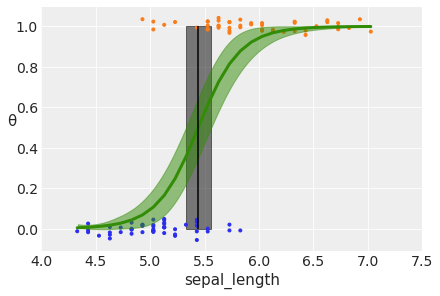

In [48]:
theta = trace_0.posterior['θ'].mean(axis=0).mean(axis=0)
idx = np.argsort(x_c)

np.random.seed(123)


plt.plot(x_c[idx], theta[idx], color='C2', lw=3)

plt.vlines(trace_0.posterior['bd'].mean(), 0, 1, color='k')

bd_hpd = az.hdi(trace_0.posterior['bd'])


plt.fill_betweenx([0, 1], bd_hpd.bd[0].values, bd_hpd.bd[1].values, color='k', alpha=0.5)


plt.scatter(x_c, np.random.normal(y_0, 0.02),
            marker='.', color=[f'C{x}' for x in y_0])


az.plot_hdi(x_c, trace_0.posterior['θ'], color='C2')  #green band 


plt.xlabel(x_n)
plt.ylabel('θ', rotation=0)
# use original scale for xticks
locs, _ = plt.xticks()
plt.xticks(locs, np.round(locs + x_0.mean(), 1))



## Multiple logistic regression

In [52]:
df = iris.query("species == ('setosa', 'versicolor')") 
y_1 = pd.Categorical(df['species']).codes 
x_n = ['sepal_length', 'sepal_width'] 
x_1 = df[x_n].values



In [86]:
with pm.Model() as model_1: 
    α = pm.Normal('α', mu=0, sd=10) 
    β = pm.Normal('β', mu=0, sd=2, shape=len(x_n)) 
     
    μ = α + pm.math.dot(x_1, β)
    
    θ = pm.Deterministic('θ', 1 / (1 + pm.math.exp(-μ))) 
    bd = pm.Deterministic('bd', -α/β[1] - β[0]/β[1] * x_1[:,0])
     
    yl = pm.Bernoulli('yl', p=θ, observed=y_1) 
 
    trace_1 = pm.sample(2000, tune=4000, return_inferencedata=True, target_accept=0.9)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [β, α]


/Users/cfanelli/Desktop/teaching/BRDS/jupynb_env_new/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/cfanelli/Desktop/teaching/BRDS/jupynb_env_new/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/cfanelli/Desktop/teaching/BRDS/jupynb_env_new/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/cfanelli/Desktop/teaching/BRDS/jupynb_env_new/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 4_000 tune and 2_000 draw iterations (16_000 + 8_000 draws total) took 17 seconds.


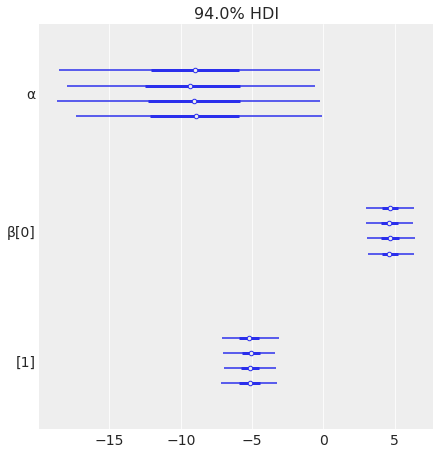

In [88]:
varnames = ['α', 'β'] 
az.plot_forest(trace_1, var_names=varnames);

Text(0, 0.5, 'sepal_width')

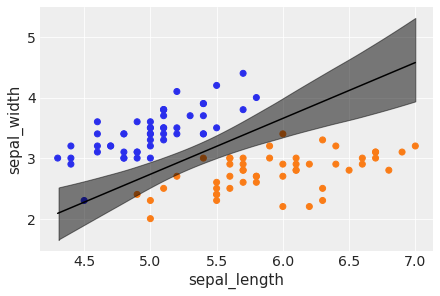

In [89]:
idx = np.argsort(x_1[:,0]) 


bd_mean = trace_1.posterior['bd'].mean(axis=0).mean(axis=0)


plt.scatter(x_1[:,0], x_1[:,1], c=[f'C{x}' for x in y_0]) 

bd = bd_mean[idx]

plt.plot(x_1[:,0][idx], bd, color='k'); 


az.plot_hdi(x_1[:,0], trace_1.posterior['bd'], color='k')
 
    
plt.xlabel(x_n[0]) 
plt.ylabel(x_n[1])



## Question in class (from D. Zhu): why is the decision boundary linear?

In [84]:
with pm.Model() as model_2: 
    α = pm.Normal('α', mu=0, sd=10) 
    β = pm.Normal('β', mu=0, sd=2, shape=len(x_n)) 
    𝛾 = pm.Normal('𝛾', mu=0, sd=2) 
     
    μ = α + pm.math.dot(x_1, β) + pm.math.dot(x_1[:,0]**2, 𝛾)
    
    θ = pm.Deterministic('θ', 1 / (1 + pm.math.exp(-μ))) 
    bd = pm.Deterministic('bd', -α/β[1] - β[0]/β[1] * x_1[:,0] - 𝛾/β[1] * x_1[:,0]**2)
     
    yl = pm.Bernoulli('yl', p=θ, observed=y_1) 
 
    trace_2 = pm.sample(2000, tune=4000, return_inferencedata=True, target_accept=0.95)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [𝛾, β, α]


/Users/cfanelli/Desktop/teaching/BRDS/jupynb_env_new/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/cfanelli/Desktop/teaching/BRDS/jupynb_env_new/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/cfanelli/Desktop/teaching/BRDS/jupynb_env_new/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/cfanelli/Desktop/teaching/BRDS/jupynb_env_new/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 4_000 tune and 2_000 draw iterations (16_000 + 8_000 draws total) took 26 seconds.


Text(0, 0.5, 'sepal_width')

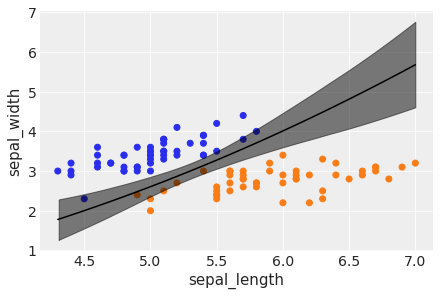

In [128]:
idx = np.argsort(x_1[:,0]) 


bd_mean = trace_2.posterior['bd'].mean(axis=0).mean(axis=0)


plt.scatter(x_1[:,0], x_1[:,1], c=[f'C{x}' for x in y_0]) 

bd = bd_mean[idx]

plt.plot(x_1[:,0][idx], bd, color='k'); 


az.plot_hdi(x_1[:,0], trace_2.posterior['bd'], color='k')
 
    
plt.xlabel(x_n[0]) 
plt.ylabel(x_n[1])


In [133]:
y_pred_2 = pm.sample_posterior_predictive(trace_2, 200, model_2) 

/Users/cfanelli/Desktop/teaching/BRDS/jupynb_env_new/lib/python3.9/site-packages/pymc3/sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


## How to plot a variate distributed according to a PyMC model 

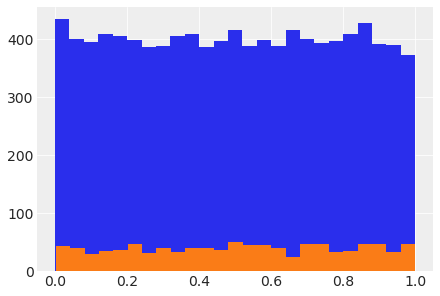

In [153]:
with pm.Model() as model_testv:
    testv = pm.Beta('testv',1.,1.)
    


syn1 = testv.random(size=10000)
plt.hist(syn1, bins=25);

syn2 = testv.random(size=1000)
plt.hist(syn2, bins=25);

